This notebook was the google-stock-rnn tutorial.
Deep Learning for Predicting Stock Prices
Aditya Gogoi


In [1]:
# !pip install keras
# !pip install tensorflow==2.1.0

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import os, os.path

Using TensorFlow backend.


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-05,254.0,247.0,252.0,249.0,5232400.0,193.482346
2015-01-06,250.0,245.0,246.0,247.0,4386200.0,191.928238
2015-01-07,253.0,240.0,246.0,253.0,11060300.0,196.590500
2015-01-08,252.0,248.0,251.0,250.0,6530700.0,194.259384
2015-01-09,251.0,248.0,251.0,248.0,4615500.0,192.705292


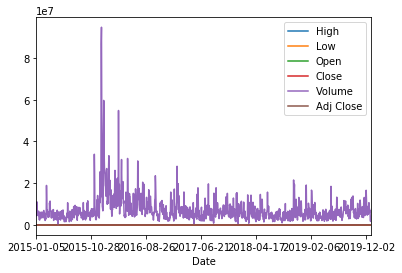

In [10]:
DATA_HOME = os.path.join("..","1.2 Identify sources and collect data","YahooFinance")
# Pilot 10 stocks (first 10 stocks alphabetical)
symbols = ["ADVANC","BTS"]
data = {}
for s in symbols:
    data[s] = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)

df = data["ADVANC"]
df.index
df = df['2015-01-01':'2019-12-31'] # Pickout study period: 2015-2019. 1219 days
df.plot()
df.head()

In [11]:
df.iloc[:,2:3].values # Get Open price. The 2:3 slice the "Open" column

array([[252.],
       [246.],
       [246.],
       ...,
       [216.],
       [216.],
       [215.]])

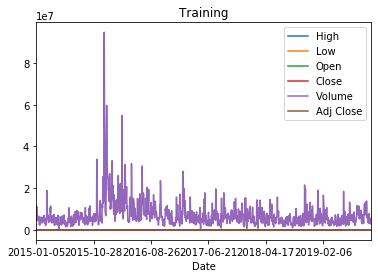

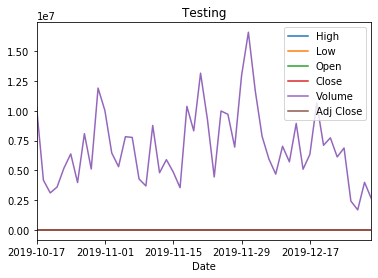

In [18]:
training = df[:-50]
testing = df[-50:]
training.plot(title="Training")
testing.plot(title="Testing")

In [19]:
trainset = training.iloc[:,2:3].values

In [20]:
trainset

array([[252.],
       [246.],
       [246.],
       ...,
       [228.],
       [230.],
       [235.]])

In [51]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [52]:
training_scaled

array([[0.96862745],
       [0.92156863],
       [0.92156863],
       ...,
       [0.78039216],
       [0.79607843],
       [0.83529412]])

In [91]:
x_train = training_scaled[0:len(training) - 1]
y_train = training_scaled[1:len(training)] # Start from day 1


In [92]:
x_train.shape, y_train.shape

((1168, 1), (1168, 1))

In [93]:
import numpy as np

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [94]:
regressor = Sequential()

# regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(LSTM(units = 4, input_shape = (x_train.shape[1],1)))

In [95]:
# regressor.add(Dropout(0.2))

In [96]:
# regressor.add(LSTM(units = 50,return_sequences = True))
# regressor.add(Dropout(0.2))

In [97]:
# regressor.add(LSTM(units = 50,return_sequences = True))
# regressor.add(Dropout(0.2))

In [98]:
# regressor.add(LSTM(units = 50))
# regressor.add(Dropout(0.2))

In [99]:
regressor.add(Dense(units = 1))

In [100]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [102]:
history = regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
1168/1168 [==============================] - 0s 126us/step - loss: 5.5945e-04
Epoch 2/100
1168/1168 [==============================] - 0s 126us/step - loss: 5.5913e-04
Epoch 3/100
1168/1168 [==============================] - 0s 181us/step - loss: 5.5839e-04
Epoch 4/100
1168/1168 [==============================] - 0s 126us/step - loss: 5.5716e-04
Epoch 5/100
1168/1168 [==============================] - 0s 143us/step - loss: 5.5887e-04
Epoch 6/100
1168/1168 [==============================] - 0s 137us/step - loss: 5.5692e-04
Epoch 7/100
1168/1168 [==============================] - 0s 174us/step - loss: 5.5606e-04
Epoch 8/100
1168/1168 [==============================] - 0s 157us/step - loss: 5.5562e-04 0s - loss: 6.0537e
Epoch 9/100
1168/1168 [==============================] - 0s 130us/step - loss: 5.5260e-04
Epoch 10/100
1168/1168 [==============================] - 0s 110us/step - loss: 5.5652e-04
Epoch 11/100
1168/1168 [==============================] - 0s 113us/step - loss: 

Epoch 91/100
1168/1168 [==============================] - 0s 127us/step - loss: 5.2849e-04
Epoch 92/100
1168/1168 [==============================] - 0s 107us/step - loss: 5.2881e-04
Epoch 93/100
1168/1168 [==============================] - 0s 117us/step - loss: 5.2958e-04
Epoch 94/100
1168/1168 [==============================] - 0s 107us/step - loss: 5.3063e-04
Epoch 95/100
1168/1168 [==============================] - 0s 99us/step - loss: 5.2761e-04
Epoch 96/100
1168/1168 [==============================] - 0s 107us/step - loss: 5.2982e-04
Epoch 97/100
1168/1168 [==============================] - 0s 126us/step - loss: 5.2936e-04
Epoch 98/100
1168/1168 [==============================] - 0s 161us/step - loss: 5.3614e-04
Epoch 99/100
1168/1168 [==============================] - 0s 113us/step - loss: 5.4454e-04
Epoch 100/100
1168/1168 [==============================] - 0s 102us/step - loss: 5.3048e-04


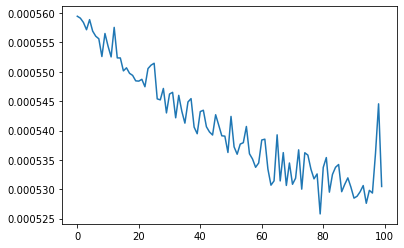

In [113]:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])


In [114]:
real_stock_price = training.iloc[:,2:3].values

In [116]:
dataset_total = pd.concat((training, testing),axis = 0)
dataset_total

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-05,254.0,247.0,252.0,249.0,5232400.0,193.482346
2015-01-06,250.0,245.0,246.0,247.0,4386200.0,191.928238
2015-01-07,253.0,240.0,246.0,253.0,11060300.0,196.590500
2015-01-08,252.0,248.0,251.0,250.0,6530700.0,194.259384
2015-01-09,251.0,248.0,251.0,248.0,4615500.0,192.705292
...,...,...,...,...,...,...
2019-12-24,221.0,214.0,220.0,215.0,6880100.0,211.406570
2019-12-25,216.0,212.0,213.0,215.0,2423600.0,211.406570
2019-12-26,216.0,214.0,216.0,215.0,1685300.0,211.406570


In [117]:
inputs = dataset_total[len(dataset_total) - len(testing) - hp:].values
inputs

NameError: name 'dataset_test' is not defined

In [ ]:
inputs = inputs.reshape(-1,1)

In [ ]:
inputs

In [ ]:
inputs = sc.transform(inputs)
inputs.shape

In [ ]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [ ]:
x_test = np.array(x_test)
x_test.shape

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

In [ ]:
predicted_price = regressor.predict(x_test)

In [ ]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

In [ ]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()